<a href="https://colab.research.google.com/github/Rudh1830/Intruder-Detection-System-Using-YOLOv8-with-Gradio-Interface/blob/main/Intruder_Detection_System_Using_YOLOv8_(Computer_Vision).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Install dependencies
!pip install ultralytics opencv-python flask pyngrok

# 2. Import libraries
import cv2, os
from datetime import datetime
from ultralytics import YOLO

# 3. Upload video
from google.colab import files
uploaded = files.upload()
video_path = list(uploaded.keys())[0]  # name of uploaded video

# 4. Create folder for intruder captures
os.makedirs("captured", exist_ok=True)

# 5. Load YOLO
model = YOLO("yolov8n.pt")

# 6. Run detection
cap = cv2.VideoCapture(video_path)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    for result in results:
        for box in result.boxes:
            cls_id = int(box.cls[0])
            conf = float(box.conf[0])
            label = model.names[cls_id]

            if label == "person" and conf > 0.5:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                intruder_img = frame[y1:y2, x1:x2]
                timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
                cv2.imwrite(f"captured/intruder_{timestamp}.jpg", intruder_img)

cap.release()

print("✅ Detection complete! Cropped intruders saved in 'captured/' folder.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

TypeError: 'NoneType' object is not subscriptable

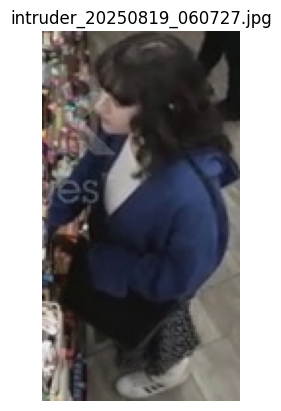

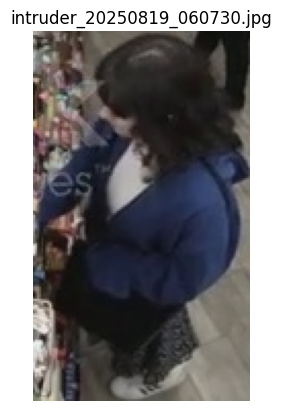

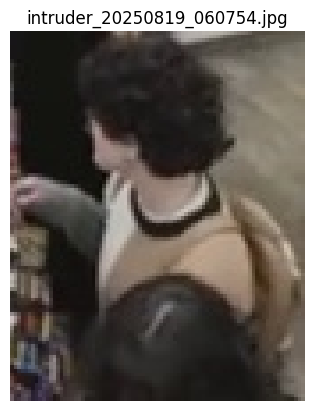

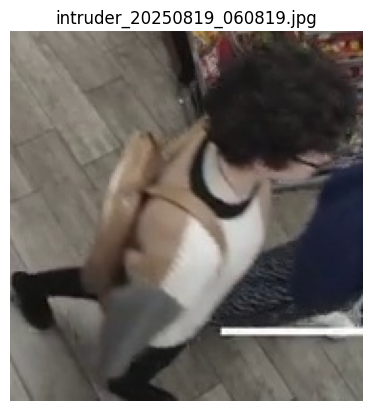

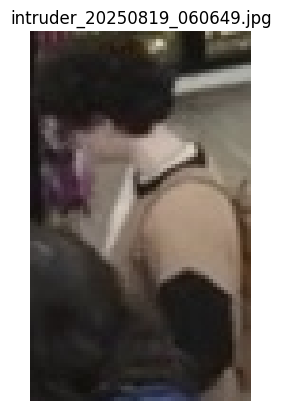

In [ ]:
import matplotlib.pyplot as plt
import cv2

for img_name in os.listdir("captured")[:5]:  # show first 5
    img = cv2.imread(f"captured/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis("off")
    plt.show()


In [ ]:
!pip install flask ultralytics opencv-python pyngrok


In [ ]:
from pyngrok import ngrok
from google.colab import userdata

# Get ngrok authtoken from Colab secrets
NGROK_AUTH_TOKEN = userdata.get("NGROK_AUTH_TOKEN")
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Start Flask with ngrok
!pkill gunicorn
public_url = ngrok.connect(5000).public_url
print("Flask App URL:", public_url)

!python app.py

In [ ]:
!pip install pyngrok
from pyngrok import ngrok

# Paste your ngrok auth token here (replace with yours)
NGROK_AUTH_TOKEN = "2lnDh4Gsl7gpkbvYMpeIDwbhlFn_2dvzbedUS8uzsdEoQ7vbY"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Start a tunnel on port 5000
public_url = ngrok.connect(5000).public_url
print("🌍 Flask App URL:", public_url)


🌍 Flask App URL: https://957e6e0037c8.ngrok-free.app


In [ ]:
!pip install ultralytics opencv-python flask pyngrok


In [ ]:
%%writefile app.py
import os
import cv2
from datetime import datetime
from flask import Flask, render_template, Response, request, redirect, url_for
from ultralytics import YOLO

# Flask setup
app = Flask(__name__)
UPLOAD_FOLDER = "uploads"
CAPTURE_FOLDER = "static/captured"
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
os.makedirs(CAPTURE_FOLDER, exist_ok=True)

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

video_path = None

def detect_intruder_from_file(filepath):
    cap = cv2.VideoCapture(filepath)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)
        for result in results:
            for box in result.boxes:
                cls_id = int(box.cls[0])
                conf = float(box.conf[0])
                label = model.names[cls_id]

                if label == "person" and conf > 0.5:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
                    cv2.putText(frame, f"{label} {conf:.2f}", (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

                    # Save intruder crop
                    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
                    intruder_img = frame[y1:y2, x1:x2]
                    if intruder_img.size > 0:
                        cv2.imwrite(f"{CAPTURE_FOLDER}/intruder_{timestamp}.jpg", intruder_img)

        ret, buffer = cv2.imencode('.jpg', frame)
        frame = buffer.tobytes()
        yield (b'--frame\r\n'
               b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n')

    cap.release()

@app.route("/", methods=["GET", "POST"])
def index():
    global video_path
    if request.method == "POST":
        file = request.files["video"]
        if file:
            filepath = os.path.join(UPLOAD_FOLDER, file.filename)
            file.save(filepath)
            video_path = filepath
            return redirect(url_for("video_feed"))
    return render_template("index.html")

@app.route("/video_feed")
def video_feed():
    return Response(detect_intruder_from_file(video_path),
                    mimetype="multipart/x-mixed-replace; boundary=frame")

@app.route("/dashboard")
def dashboard():
    images = sorted(os.listdir(CAPTURE_FOLDER))
    images = [f"captured/{img}" for img in images]
    return render_template("dashboard.html", images=images)

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000)


In [ ]:
!pip install pyngrok flask ultralytics opencv-python


In [ ]:
from pyngrok import ngrok
NGROK_AUTH_TOKEN = "2lnDh4Gsl7gpkbvYMpeIDwbhlFn_2dvzbedUS8uzsdEoQ7vbY"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)


In [ ]:
public_url = ngrok.connect(5000).public_url
print("🌍 Flask App URL:", public_url)


🌍 Flask App URL: https://e08f7a910795.ngrok-free.app


In [ ]:
!python app.py


python3: can't open file '/content/app.py': [Errno 2] No such file or directory


In [ ]:
!pip install ultralytics opencv-python gradio


In [ ]:
import cv2
import os
from datetime import datetime
import gradio as gr
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Create folder for intruder screenshots
CAPTURE_FOLDER = "captured"
os.makedirs(CAPTURE_FOLDER, exist_ok=True)

def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    intruder_images = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)
        for result in results:
            for box in result.boxes:
                cls_id = int(box.cls[0])
                conf = float(box.conf[0])
                label = model.names[cls_id]

                if label == "person" and conf > 0.5:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
                    cv2.putText(frame, f"{label} {conf:.2f}", (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

                    # Save cropped intruder image
                    intruder_img = frame[y1:y2, x1:x2]
                    if intruder_img.size > 0:
                        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
                        filepath = f"{CAPTURE_FOLDER}/intruder_{timestamp}.jpg"
                        cv2.imwrite(filepath, intruder_img)
                        intruder_images.append(filepath)

    cap.release()

    if intruder_images:
        return intruder_images
    else:
        return ["No intruders detected"]

# Gradio interface
demo = gr.Interface(
    fn=process_video,
    inputs=gr.Video(label="Upload CCTV Footage"),
    outputs=gr.Gallery(label="Detected Intruders"),
    title="🎥 Intruder Detection System",
    description="Upload a CCTV video and detect intruders (people). Cropped intruder images will be shown below."
)

demo.launch(share=True)  # share=True gives public link

In [ ]:
!pip install ultralytics opencv-python face-recognition gradio


0: 384x640 3 persons, 1 laptop, 319.4ms
Speed: 3.1ms preprocess, 319.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1 laptop, 587.8ms
Speed: 2.9ms preprocess, 587.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 laptop, 222.1ms
Speed: 3.1ms preprocess, 222.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 laptop, 255.7ms
Speed: 3.5ms preprocess, 255.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 laptop, 214.0ms
Speed: 3.3ms preprocess, 214.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 laptop, 229.9ms
Speed: 3.8ms preprocess, 229.9ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 laptop, 283.8ms
Speed: 3.0ms preprocess, 283.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 lap

In [ ]:
import cv2
import os
import gradio as gr
from datetime import datetime
from ultralytics import YOLO
from deepface import DeepFace

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Owner image (must exist in project folder)
OWNER_IMAGE = "owner.jpg"

# Folder for intruder screenshots
CAPTURE_FOLDER = "captured"
os.makedirs(CAPTURE_FOLDER, exist_ok=True)

def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    intruder_images = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)

        for result in results:
            for box in result.boxes:
                cls_id = int(box.cls[0])
                conf = float(box.conf[0])
                label = model.names[cls_id]

                if label == "person" and conf > 0.5:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    person_crop = frame[y1:y2, x1:x2]

                    # Save cropped face temporarily
                    temp_path = "temp_face.jpg"
                    cv2.imwrite(temp_path, person_crop)

                    try:
                        # Check if owner.jpg exists before attempting verification
                        if not os.path.exists(OWNER_IMAGE):
                            print(f"Warning: {OWNER_IMAGE} not found. Skipping owner verification.")
                            tag = "Unknown (owner.jpg missing)"
                            color = (255, 255, 0)
                        else:
                            # Use DeepFace to verify if the person is the owner
                            # We set enforce_detection=False because YOLO has already detected a person
                            result = DeepFace.verify(temp_path, OWNER_IMAGE, enforce_detection=False)
                            if result["verified"]:
                                tag = "Owner"
                                color = (0, 255, 0)
                            else:
                                tag = "Intruder"
                                color = (0, 0, 255)

                                # Save intruder snapshot
                                timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
                                filepath = f"{CAPTURE_FOLDER}/intruder_{timestamp}.jpg"
                                cv2.imwrite(filepath, person_crop)
                                intruder_images.append(filepath)

                    except ValueError as e:
                        if "Face could not be detected in" in str(e):
                            print(f"Warning: No face detected by DeepFace in {temp_path} or {OWNER_IMAGE}. Cannot verify.")
                            tag = "No Face (DeepFace)"
                            color = (255, 0, 0)
                        else:
                            print(f"DeepFace verification error: {e}")
                            tag = "Error (DeepFace)"
                            color = (0, 0, 255) # Indicate an error with red
                    except Exception as e:
                        print(f"An unexpected error occurred during DeepFace verification: {e}")
                        tag = "Error (DeepFace)"
                        color = (0, 0, 255) # Indicate an error with red

                    finally:
                        # Clean up temporary file
                        if os.path.exists(temp_path):
                            os.remove(temp_path)

                    # Draw bounding box
                    cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
                    cv2.putText(frame, tag, (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)


    cap.release()

    if intruder_images:
        return intruder_images
    else:
        return ["No intruders detected"]

# Gradio Interface
demo = gr.Interface(
    fn=process_video,
    inputs=gr.Video(label="Upload CCTV Footage"),
    outputs=gr.Gallery(label="Detected Intruders"),
    title="🔒 Intruder Detection with Owner Recognition (DeepFace)",
    description="Upload a CCTV video. The system checks if the detected person is the Owner or an Intruder."
)

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://686e91276053116c3d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 889.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [ ]:
!pip install ultralytics opencv-python deepface gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/128.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9

In [ ]:
import cv2
import os
import gradio as gr
from datetime import datetime
from ultralytics import YOLO
from deepface import DeepFace

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Owner image (must exist in project folder)
OWNER_IMAGE = "OWNER.png"

# Folder for intruder screenshots
CAPTURE_FOLDER = "captured"
os.makedirs(CAPTURE_FOLDER, exist_ok=True)

# Load the cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    intruder_images = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)

        for result in results:
            for box in result.boxes:
                cls_id = int(box.cls[0])
                conf = float(box.conf[0])
                label = model.names[cls_id]

                if label == "person" and conf > 0.5:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    person_crop = frame[y1:y2, x1:x2]

                    gray = cv2.cvtColor(person_crop, cv2.COLOR_BGR2GRAY)
                    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

                    for (fx, fy, fw, fh) in faces:
                        face_crop = person_crop[fy:fy+fh, fx:fx+fw]

                        # Save cropped face temporarily
                        temp_path = "temp_face.jpg"
                        cv2.imwrite(temp_path, face_crop)

                        try:
                            # Check if owner.jpg exists before attempting verification
                            if not os.path.exists(OWNER_IMAGE):
                                print(f"Warning: {OWNER_IMAGE} not found. Skipping owner verification.")
                                tag = "Unknown (owner.jpg missing)"
                                color = (255, 255, 0)
                            else:
                                result = DeepFace.verify(temp_path, OWNER_IMAGE, enforce_detection=False)
                                if result["verified"]:
                                    tag = "Owner"
                                    color = (0, 255, 0)
                                else:
                                    tag = "Intruder"
                                    color = (0, 0, 255)

                                    # Save intruder snapshot
                                    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
                                    filepath = f"{CAPTURE_FOLDER}/intruder_{timestamp}.jpg"
                                    cv2.imwrite(filepath, person_crop)
                                    intruder_images.append(filepath)

                        except ValueError as e:
                            if "Face could not be detected in" in str(e):
                                print(f"Warning: No face detected by DeepFace in {temp_path} or {OWNER_IMAGE}. Cannot verify.")
                                tag = "No Face (DeepFace)"
                                color = (255, 0, 0)
                            else:
                                print(f"DeepFace verification error: {e}")
                                tag = "Error (DeepFace)"
                                color = (0, 0, 255) # Indicate an error with red
                        except Exception as e:
                            print(f"An unexpected error occurred during DeepFace verification: {e}")
                            tag = "Error (DeepFace)"
                            color = (0, 0, 255) # Indicate an error with red

                        finally:
                            # Clean up temporary file
                            if os.path.exists(temp_path):
                                os.remove(temp_path)

                        # Draw bounding box for face
                        cv2.rectangle(person_crop, (fx, fy), (fx+fw, fy+fh), color, 2)
                        cv2.putText(person_crop, tag, (fx, fy-10),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

                    # Draw bounding box for person
                    cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
                    cv2.putText(frame, tag, (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)


    cap.release()

    if intruder_images:
        return intruder_images
    else:
        return ["No intruders detected"]

# Gradio Interface
demo = gr.Interface(
    fn=process_video,
    inputs=gr.Video(label="Upload CCTV Footage"),
    outputs=gr.Gallery(label="Detected Intruders"),
    title="🔒 Intruder Detection with Owner Recognition (DeepFace)",
    description="Upload a CCTV video. The system checks if the detected person is the Owner or an Intruder."
)

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b96726ecf1bfcc8b56.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
from deepface import DeepFace
import numpy as np
import cv2, os
from datetime import datetime

OWNER_IMAGE = "owner.jpg"
CAPTURE_FOLDER = "captured"
if not os.path.exists(CAPTURE_FOLDER):
    os.makedirs(CAPTURE_FOLDER)

# Precompute owner embedding
owner_embedding = DeepFace.represent(OWNER_IMAGE, model_name="Facenet", enforce_detection=False)[0]["embedding"]

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

def check_identity(face_crop):
    temp_path = "temp_face.jpg"
    cv2.imwrite(temp_path, face_crop)

    try:
        face_repr = DeepFace.represent(temp_path, model_name="Facenet", enforce_detection=False)
        if len(face_repr) == 0:
            return "Unknown"

        embedding = face_repr[0]["embedding"]
        sim = cosine_similarity(owner_embedding, embedding)

        if sim > 0.6:   # threshold (tuneable!)
            return "Owner"
        else:
            # Save intruder
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            filepath = f"{CAPTURE_FOLDER}/intruder_{timestamp}.jpg"
            cv2.imwrite(filepath, face_crop)
            return "Intruder"
    except:
        return "Unknown"


25-08-19 10:08:30 - 🔗 facenet_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5 to /root/.deepface/weights/facenet_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:02<00:00, 30.8MB/s]


In [ ]:
#actual
from deepface import DeepFace
import numpy as np
import cv2, os
from datetime import datetime

OWNER_IMAGE = "owner.jpg"
CAPTURE_FOLDER = "captured"
if not os.path.exists(CAPTURE_FOLDER):
    os.makedirs(CAPTURE_FOLDER)

owner_embedding = DeepFace.represent(OWNER_IMAGE, model_name="Facenet", enforce_detection=False)[0]["embedding"]

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

def check_identity(face_crop):
    temp_path = "temp_face.jpg"
    cv2.imwrite(temp_path, face_crop)
    try:
        face_repr = DeepFace.represent(temp_path, model_name="Facenet", enforce_detection=False)
        if len(face_repr) == 0:
            return "Unknown"

        embedding = face_repr[0]["embedding"]
        sim = cosine_similarity(owner_embedding, embedding)

        if sim > 0.6:
            return "Owner"
        else:
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            filepath = f"{CAPTURE_FOLDER}/intruder_{timestamp}.jpg"
            cv2.imwrite(filepath, face_crop)
            return "Intruder"
    except:
        return "Unknown"


In [ ]:
import cv2
import torch
import os
import numpy as np
from datetime import datetime
import gradio as gr
from ultralytics import YOLO
from deepface import DeepFace

# ----------------- Setup -----------------
OWNER_IMAGE = "owner.jpg"   # <-- put your owner's image here
CAPTURE_FOLDER = "captured"

if not os.path.exists(CAPTURE_FOLDER):
    os.makedirs(CAPTURE_FOLDER)

# Load YOLOv8
model = YOLO("yolov8n.pt")

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Precompute owner embedding
owner_embedding = DeepFace.represent(OWNER_IMAGE, model_name="Facenet", enforce_detection=False)[0]["embedding"]

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

def check_identity(face_crop):
    temp_path = "temp_face.jpg"
    cv2.imwrite(temp_path, face_crop)

    try:
        face_repr = DeepFace.represent(temp_path, model_name="Facenet", enforce_detection=False)
        if len(face_repr) == 0:
            return "Unknown"

        embedding = face_repr[0]["embedding"]
        sim = cosine_similarity(owner_embedding, embedding)

        if sim > 0.6:   # similarity threshold
            return "Owner"
        else:
            # Save intruder
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            filepath = f"{CAPTURE_FOLDER}/intruder_{timestamp}.jpg"
            cv2.imwrite(filepath, face_crop)
            return "Intruder"
    except:
        return "Unknown"

# ----------------- Processing Function -----------------
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    out_path = "processed_output.mp4"
    out = cv2.VideoWriter(out_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)

        for result in results:
            boxes = result.boxes
            for box in boxes:
                cls_id = int(box.cls[0])
                conf = float(box.conf[0])
                label = model.names[cls_id]

                if label == "person" and conf > 0.5:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    person_crop = frame[y1:y2, x1:x2]

                    gray = cv2.cvtColor(person_crop, cv2.COLOR_BGR2GRAY)
                    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

                    for (fx, fy, fw, fh) in faces:
                        face_crop = person_crop[fy:fy+fh, fx:fx+fw]
                        tag = check_identity(face_crop)

                        color = (0, 255, 0) if tag == "Owner" else (0, 0, 255)
                        cv2.rectangle(person_crop, (fx, fy), (fx+fw, fy+fh), color, 2)
                        cv2.putText(person_crop, tag, (fx, fy-10),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

        out.write(frame)

    cap.release()
    out.release()
    return out_path

# ----------------- Gradio UI -----------------
with gr.Blocks() as demo:
    gr.Markdown("## 👀 Video Surveillance & Intruder Detection")
    video_input = gr.Video(label="Upload CCTV Footage")
    video_output = gr.Video(label="Processed Output")

    run_btn = gr.Button("Run Detection")
    run_btn.click(fn=process_video, inputs=video_input, outputs=video_output)

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://45dfeaaba1329991f5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import cv2
import torch
import os
import numpy as np
from datetime import datetime
import gradio as gr
from ultralytics import YOLO
from deepface import DeepFace

# ----------------- Setup -----------------
OWNER_IMAGE = "owner.jpg"   # <-- place your owner's image here
CAPTURE_FOLDER = "captured"

if not os.path.exists(CAPTURE_FOLDER):
    os.makedirs(CAPTURE_FOLDER)

# Load YOLOv8
model = YOLO("yolov8n.pt")

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Precompute owner embedding
owner_embedding = DeepFace.represent(OWNER_IMAGE, model_name="Facenet", enforce_detection=False)[0]["embedding"]

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

def check_identity(face_crop):
    temp_path = "temp_face.jpg"
    cv2.imwrite(temp_path, face_crop)

    try:
        face_repr = DeepFace.represent(temp_path, model_name="Facenet", enforce_detection=False)
        if len(face_repr) == 0:
            return "Unknown", None

        embedding = face_repr[0]["embedding"]
        sim = cosine_similarity(owner_embedding, embedding)

        if sim > 0.6:   # similarity threshold
            return "Owner", None
        else:
            # Save intruder
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            filepath = f"{CAPTURE_FOLDER}/intruder_{timestamp}.jpg"
            cv2.imwrite(filepath, face_crop)
            return "Intruder", filepath
    except:
        return "Unknown", None

# ----------------- Processing Function -----------------
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        return None, []   # return empty results if video fails

    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    out_path = "processed_output.mp4"
    out = cv2.VideoWriter(out_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    intruder_images = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        try:
            results = model(frame)
        except Exception as e:
            print("YOLO error:", e)
            continue

        for result in results:
            for box in result.boxes:
                cls_id = int(box.cls[0])
                conf = float(box.conf[0])
                label = model.names[cls_id]

                if label == "person" and conf > 0.5:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    person_crop = frame[y1:y2, x1:x2]

                    gray = cv2.cvtColor(person_crop, cv2.COLOR_BGR2GRAY)
                    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

                    for (fx, fy, fw, fh) in faces:
                        face_crop = person_crop[fy:fy+fh, fx:fx+fw]
                        tag, saved_path = check_identity(face_crop)

                        color = (0, 255, 0) if tag == "Owner" else (0, 0, 255)
                        cv2.rectangle(person_crop, (fx, fy), (fx+fw, fy+fh), color, 2)
                        cv2.putText(person_crop, tag, (fx, fy-10),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

                        if tag == "Intruder" and saved_path:
                            intruder_images.append(saved_path)

        out.write(frame)

    cap.release()
    out.release()

    # Always return correct formats:
    return out_path, intruder_images if intruder_images else []


# ----------------- Gradio UI -----------------
# ----------------- Gradio UI -----------------
with gr.Blocks() as demo:
    gr.Markdown("## 👀 Video Surveillance & Intruder Detection")

    video_input = gr.File(label="Upload CCTV Footage", type="filepath", file_types=[".mp4", ".avi", ".mov"])
    video_output = gr.Video(label="Processed Output")
    intruder_gallery = gr.Gallery(label="Detected Intruders", columns=4, height="auto")

    run_btn = gr.Button("Run Detection")
    run_btn.click(fn=process_video, inputs=video_input, outputs=[video_output, intruder_gallery])

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://870285e03fbbc6d1ec.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
